<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---

* Họ tên sinh viên:
* Mã sinh viên:
* Lớp/Nhóm môn học:
* Email:

---

## CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - Phần 02
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='500px'>

## B| THỰC HÀNH TRÊN LỚP:
---
Sử dụng dữ liệu đã được tiền xử lý trong tập Data_titanic_ok.csv của chương 2. Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách:
<img src='Pic/titanic.jpg'>

### B1. Đọc và chuẩn bị dữ liệu

In [2]:
#Đọc tập dữ liệu đã xử lý trong chương 2
import pandas as pd
df = pd.read_csv('Data\Data_titanic_ok.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên - cuối cùng của Dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [4]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1304,0,3,0,1,0,0,0
1305,1,1,1,2,0,0,1
1306,0,3,0,2,0,0,0
1307,0,3,0,1,0,0,0
1308,0,3,0,1,1,1,1


In [5]:
#Tách biến độc lập - biến phụ thuộc
#1.Tách biến độc lập X_titanic
X_ttn = df.iloc[:,1:].values
X_ttn



array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [6]:
#2.Tách biến độ lập y_titanic
y_ttn = df['Survived'].values
y_ttn



array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split
X_ttn_train,X_ttn_test,y_ttn_train,y_ttn_test = train_test_split(X_ttn,y_ttn, test_size = 0.25, random_state= 42)
print(X_ttn_train.shape)
print(y_ttn_train.shape)




(981, 6)
(981,)


### B.2 Xây dựng và đánh giá Model

In [8]:
#Xây dựng model và huấn luyện:
from sklearn.tree import DecisionTreeClassifier


#Khai báo model với các tham số mặc định:
md_ttn = DecisionTreeClassifier()


#Huấn luyện model với tập Train:
md_ttn.fit(X_ttn_train,y_ttn_train)


#Độ chính xác của Model trên tập Huấn luyện
print(round(md_ttn.score(X_ttn_train, y_ttn_train)*100,2))

89.91


In [9]:
df.info()
df.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [10]:
ft_ttn = list(df.columns.values[1:])
ft_ttn

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [11]:
target_ttn = ['0:died', '1:living']
print(target_ttn)

['0:died', '1:living']


[0.07444652 0.71268062 0.04766748 0.0674089  0.06098875 0.03680773]


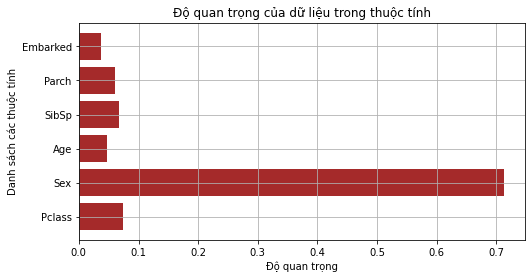

In [12]:
import matplotlib.pyplot as plt
#Xác định mức độ quan trọng của các feature:
print(md_ttn.feature_importances_)




#Trực quan hóa các thuộc tính quan trọng
plt.figure(figsize = (8,4))
plt.barh(ft_ttn, md_ttn.feature_importances_, color = 'brown')
plt.title('Độ quan trọng của dữ liệu trong thuộc tính')
plt.ylabel('Danh sách các thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()





In [18]:
import matplotlib.pyplot as plt


#Trực quan hóa cây quyết định đã huấn luyện được:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(md_ttn, feature_names = ft_ttn, class_names = target_ttn, filled = True)
plt.show()




NameError: name 'tree' is not defined

<Figure size 1800x1440 with 0 Axes>

In [23]:
#View cây với độ sâu = 3
fig = plt.figure(figsize=(25,20))
tree.plot_tree(md_ttn, feature_names = ft_ttn, class_names = target_ttn,max_depth = 3, fontsize = 10, filled = True)
plt.show()



<Figure size 1800x1440 with 0 Axes>

In [24]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu cảu cây', md_ttn.get_depth())


#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá', md_ttn.get_n_leaves())


Độ sâu cảu cây 13
Số nút lá 121


In [25]:
#Phân loại hành khách được cứu| không được cứu trên tập kiểm thử
y_ttn_pred = md_ttn.predict(X_ttn_test)
print('Model dự đoán', y_ttn_pred[:30])
print('Giá trị thật ', y_ttn_test[:30])




Model dự đoán [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Giá trị thật  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [26]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc_ttn = accuracy_score(y_ttn_test, y_ttn_pred)
acc_ttn_num = accuracy_score(y_ttn_test, y_ttn_pred, normalize = False)
print('Độ chính xác trên tập test:', round(acc_ttn*100,2))
print('Tổng số dự đoán đúng:',acc_ttn_num, '/', len(y_ttn_test))



Độ chính xác trên tập test: 82.01
Tổng số dự đoán đúng: 269 / 328


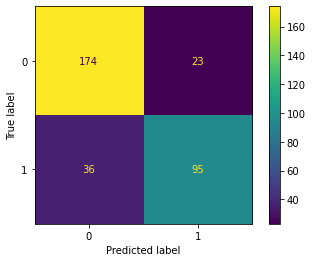

In [29]:
#Hiển thị confusion matrix:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(md_ttn, X_ttn_test,y_ttn_test)
plt.show()




### B.3 Thay đổi tham số của model Titanic, đánh giá độ chính xác:
---
Sinh viên thay đổi các tham số của model để thu được độ chính xác cao hơn.

In [30]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
md_ttn.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
md_ttn2  = DecisionTreeClassifier(criterion= 'entropy', 
                                    max_depth = 13,
                                     splitter='best', 
                                      min_samples_split = 2,
                                     max_features = 'auto',
                                  min_samples_leaf = 1,
                                    random_state = 42,
                                  max_leaf_nodes = None
                                     )
md_ttn2.fit(X_ttn_train, y_ttn_train)
print(round(md_ttn2.score(X_ttn_train, y_ttn_train)*100,2))
print(round(md_ttn.score(X_ttn_train, y_ttn_train)*100,2))

89.91
89.91


In [33]:
y_ttn2_pred = md_ttn.predict(X_ttn_test)
print('Model dự đoán', y_ttn2_pred[:30])
print('Giá trị thật ', y_ttn_test[:30])

Model dự đoán [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Giá trị thật  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [41]:
from sklearn.metrics import accuracy_score
acc_ttn2 = accuracy_score(y_ttn_test, y_ttn2_pred)
acc_ttn2_num = accuracy_score(y_ttn_test, y_ttn2_pred, normalize = False)
print('Độ chính xác trên tập test 1:', round(acc_ttn*100,2))
print('Độ chính xác trên tập test 2:', round(acc_ttn2*100,2))
print('Tổng số dự đoán đúng:',acc_ttn2_num, '/', len(y_ttn_test))

Độ chính xác trên tập test 1: 82.01
Độ chính xác trên tập test 2: 82.01
Tổng số dự đoán đúng: 269 / 328


# THỰC HÀNH SỐ 7: THUẬT TOÁN DECISION TREE
---
Sử dụng thuật toán Decision tree phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán Decision để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
 
* Sử dụng thuật toán Cây quyết định  trong 2 trường hợp:
    * Sử dụng độ đo Entropy: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    * Sử dụng độ đo Gini: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    
* Một mẫu rượu có các tham số như sau:
     * Alcohol				: 12.7	
     * Malic acid			: 3.05
     * Ash		    		: 1.88
     * Alcalinity of ash	: 28.8
     * Magnesium			: 101.1
     * Total phenols		: 2.88
     * Flavanoids			: 3.88
     * Nonflavanoid phenols	: 0.44
     * Proanthocyanins		: 2.88
     * Color intensity		: 8.8
     * Hue				    : 1.48
     * OD280/OD315 of diluted wines	: 3.88
     * Proline              :888
     
     Sử dụng model có độ chính xác cao nhất thu được ở yêu cầu 3, cho biết mẫu rượu này thuộc loại nào?

In [35]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
df_wine['target'] = wine.target
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [36]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
X_wine, y_wine = load_wine(return_X_y=True)
X_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [145]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [148]:
X_wine_train,X_wine_test,y_wine_train,y_wine_test = train_test_split(X_wine,y_wine,test_size = 0.25,random_state = 42)
print("1. Kích thước tập Training: %d" %len(y_wine_train))
print("2. Kích thước tập Test    : %d" %len(y_wine_test))

1. Kích thước tập Training: 133
2. Kích thước tập Test    : 45


In [149]:
md_wine1 = DecisionTreeClassifier(criterion = 'gini')
md_wine2 = DecisionTreeClassifier(criterion = 'entropy')
md_wine1.fit(X_wine_train,y_wine_train)
md_wine2.fit(X_wine_train,y_wine_train)
print("Độ chính xác của tập huấn luyện wine1:",round(md_wine1.score(X_wine_train, y_wine_train)*100,2))
print("Độ chính xác của tập huấn luyện wine2:",round(md_wine2.score(X_wine_train, y_wine_train)*100,2))

Độ chính xác của tập huấn luyện wine1: 100.0
Độ chính xác của tập huấn luyện wine2: 100.0


In [42]:
ft_wine = list(df_wine.columns.values[:13])
tg_wine = ['0: loai 0', '1: loai 1', '2: loai 2']
print(ft_wine)
print(ft_class)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


NameError: name 'ft_class' is not defined

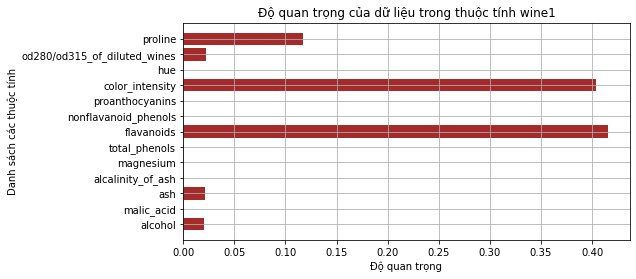

In [160]:
plt.figure(figsize = (8,4))
plt.barh(ft_wine, md_wine1.feature_importances_, color = 'brown')
plt.title('Độ quan trọng của dữ liệu trong thuộc tính wine1')
plt.ylabel('Danh sách các thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

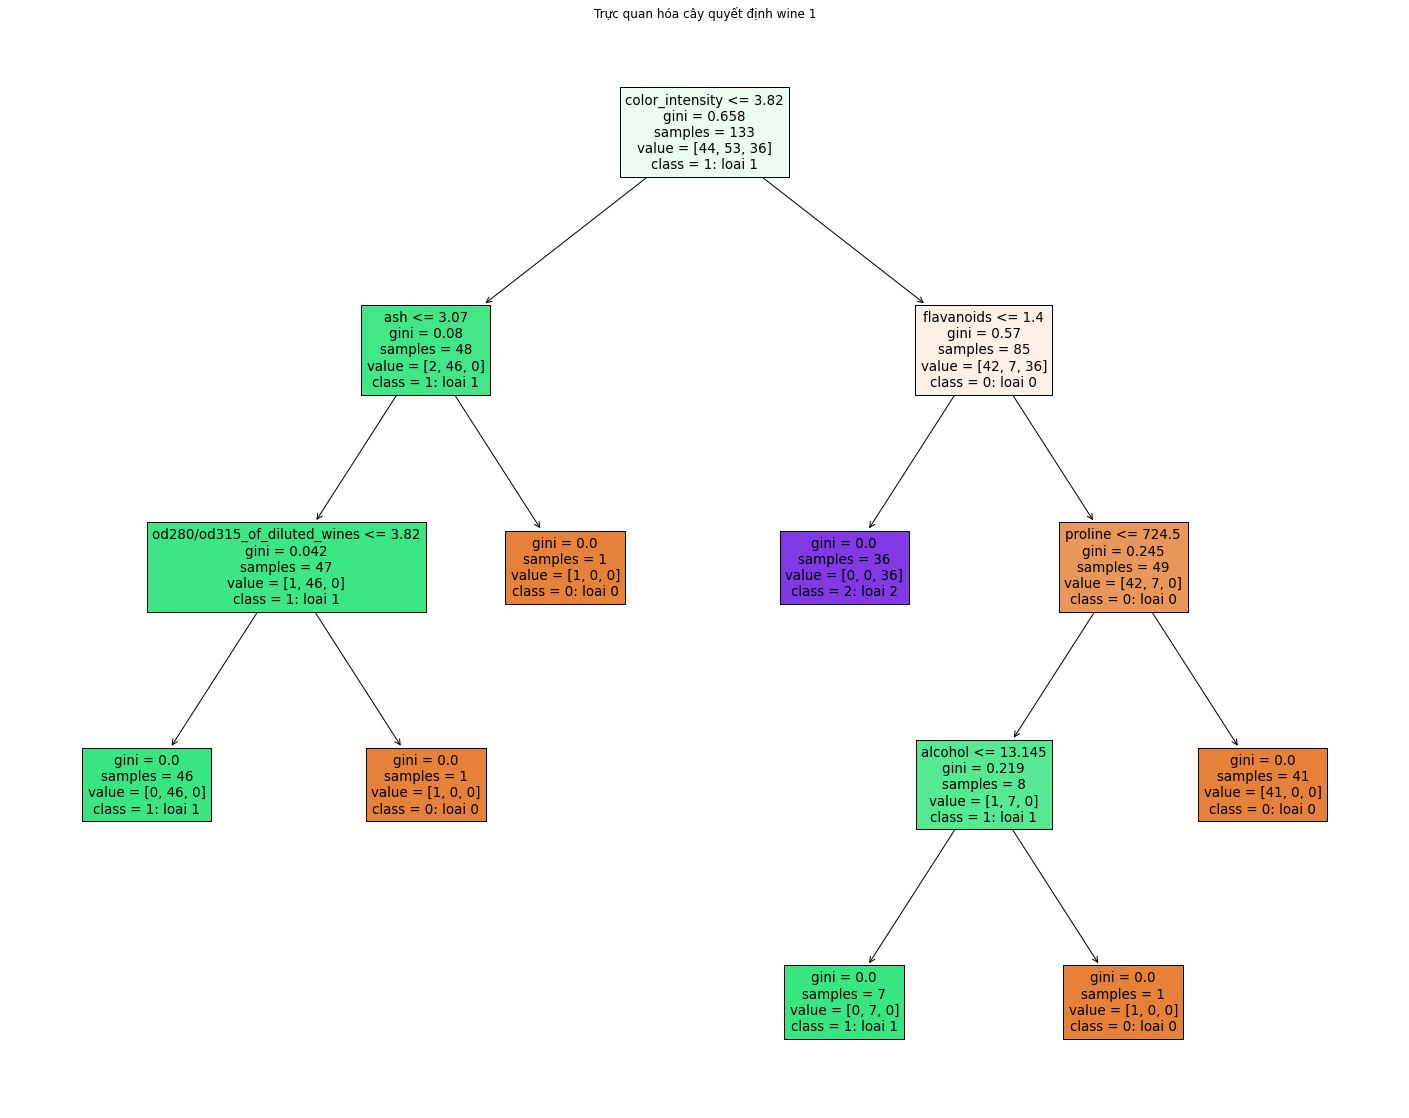

In [169]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(md_wine1, feature_names = ft_wine, class_names = tg_wine,filled = True)
plt.title('Trực quan hóa cây quyết định wine 1')
plt.show()


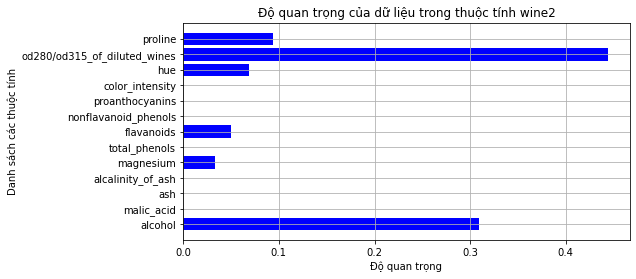

In [165]:
plt.figure(figsize = (8,4))
plt.barh(ft_wine, md_wine2.feature_importances_, color = 'blue')
plt.title('Độ quan trọng của dữ liệu trong thuộc tính wine2')
plt.ylabel('Danh sách các thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

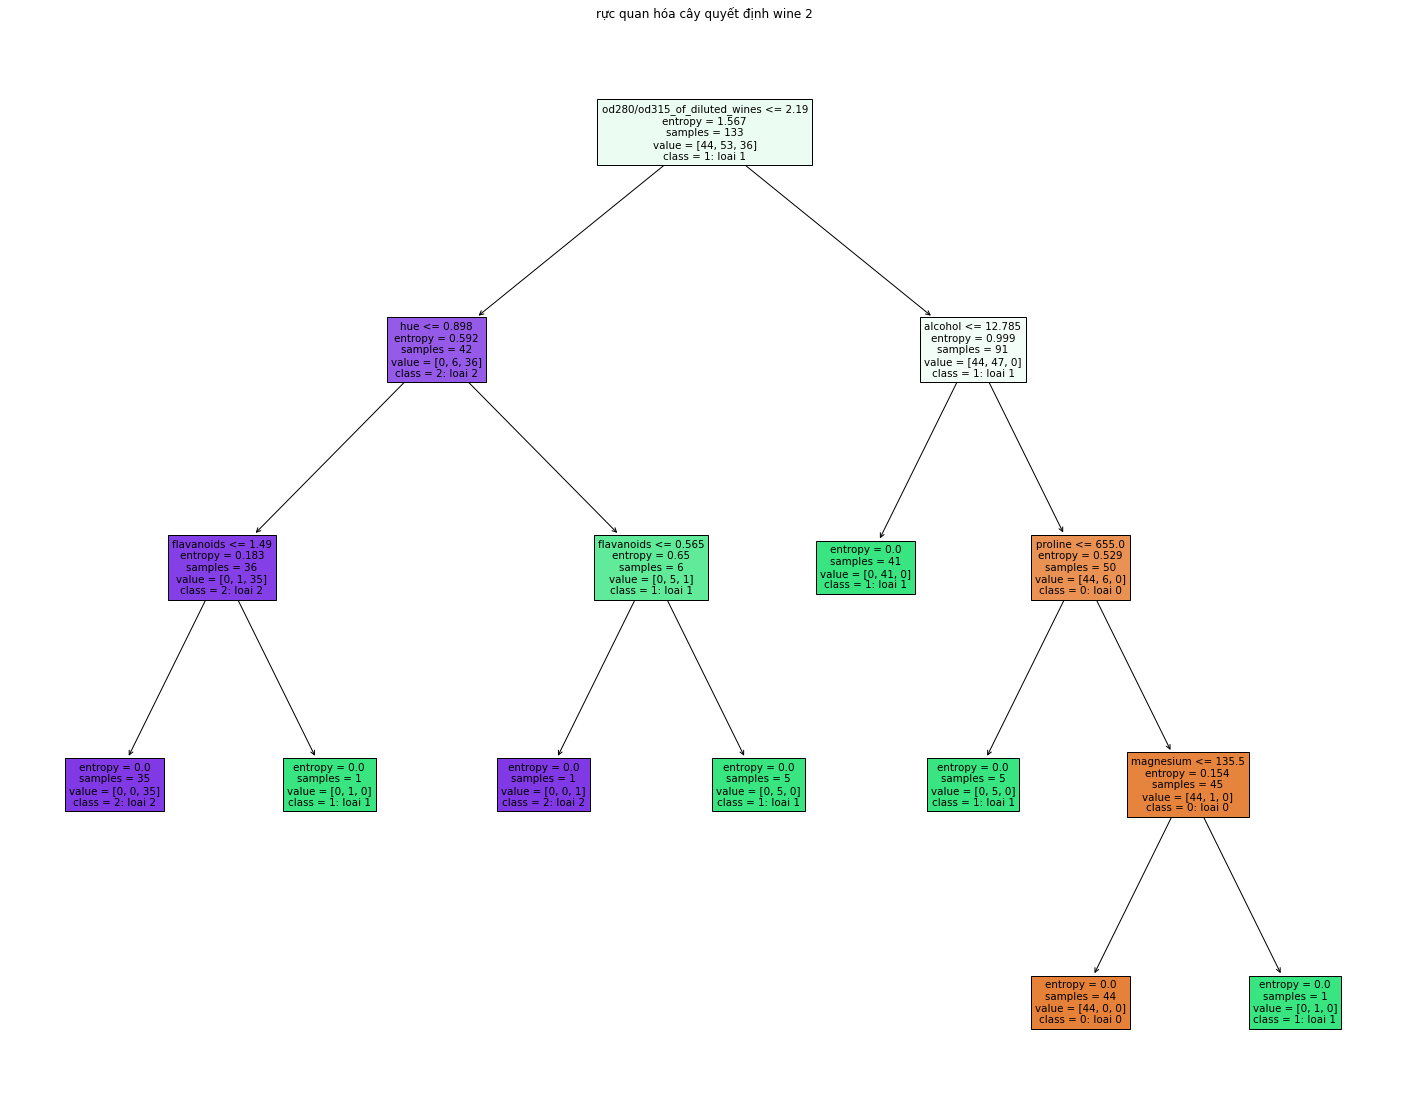

In [170]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(md_wine2, feature_names = ft_wine,class_names = tg_wine, filled = True)
plt.title('rực quan hóa cây quyết định wine 2')
plt.show()

In [172]:
y_wine1_pred = md_wine1.predict(X_wine_test)
y_wine2_pred = md_wine2.predict(X_wine_test)
print('wine 1')
print('Model dự đoán', y_wine1_pred[:30])
print('Giá trị thật ', y_wine_test[:30])

print('wine 2')
print('Model dự đoán', y_wine2_pred[:30])
print('Giá trị thật ', y_wine_test[:30])

Wine 1
Model dự đoán [0 0 2 0 1 0 1 2 1 2 1 0 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0]
Giá trị thật  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0]
wine 2
Model dự đoán [0 0 1 0 1 0 1 2 1 0 0 1 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0]
Giá trị thật  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0]


In [176]:
acc_wine1 = accuracy_score(y_wine_test, y_wine1_pred)
acc_wine1_num = accuracy_score(y_wine_test, y_wine1_pred, normalize = False)
print('wine 1')
print('Độ chính xác trên tập test:', round(acc_wine1*100,2))
print('Tổng số dự đoán đúng:',acc_wine1_num, '/', len(y_wine_test))

wine 1
Độ chính xác trên tập test: 93.33
Tổng số dự đoán đúng: 42 / 45


In [177]:
acc_wine2 = accuracy_score(y_wine_test, y_wine2_pred)
acc_wine2_num = accuracy_score(y_wine_test, y_wine2_pred, normalize = False)
print('wine 2')
print('Độ chính xác trên tập test:', round(acc_wine2*100,2))
print('Tổng số dự đoán đúng:',acc_wine2_num, '/', len(y_wine_test))

wine 2
Độ chính xác trên tập test: 88.89
Tổng số dự đoán đúng: 40 / 45


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


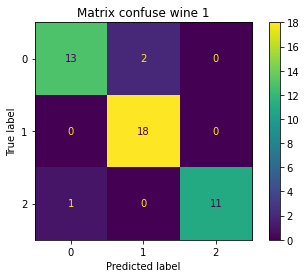

In [178]:
plot_confusion_matrix(md_wine1, X_wine_test,y_wine_test)
plt.title('Matrix confuse wine 1')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


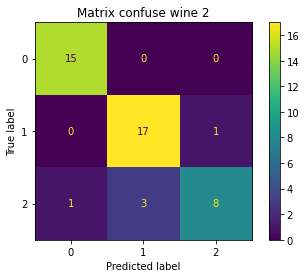

In [179]:
plot_confusion_matrix(md_wine2, X_wine_test,y_wine_test)
plt.title('Matrix confuse wine 2')
plt.show()

In [181]:
X_new = np.array([(12.7,3.05,1.88,28.8,101.1,2.88,3.88,0.44,2.88,8.8,1.48,3.88,888)])

print('Thông số mẫu rượu mới:', X_new)
#Xác định lớp của hoa dựa vào các thông số này trên model đã huấn luyện
y_new = md_wine1.predict(X_new)

print('---------------------------------------------')
print('MACHINE LEARNING dự đoán đây là rượu:')
if y_new==0:
    print(tg_wine[0])
elif y_new==1:
    print(tg_wine[1])
else:
    print(tg_wine[2])

Thông số mẫu rượu mới: [[1.270e+01 3.050e+00 1.880e+00 2.880e+01 1.011e+02 2.880e+00 3.880e+00
  4.400e-01 2.880e+00 8.800e+00 1.480e+00 3.880e+00 8.880e+02]]
---------------------------------------------
MACHINE LEARNING dự đoán đây là rượu:
0: loai 0
